# Clase 2: Librería Chainladder

<a href="https://colab.research.google.com/github/andesanalytics/python/blob/main/docs/modulo_4/Clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción a Chainladder

+ La biblioteca `chainladder` de Python es una herramienta utilizada en el análisis actuarial,
principalmente en el ámbito de seguros.

+ Su principal función es ayudar en la estimación de reservas de siniestros ocurridos y no reportados.

+ La librería posee multiples técnicas de proyección, que se basan en el análisis de triángulos de desarrollo de pérdidas, que
permiten proyectar los siniestros futuros basados en los datos históricos


## Instalación y Configuración

Para instalar la biblioteca `chainladder`, ejecuta el siguiente comando en tu entorno Python:


In [4]:
pip install chainladder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00


Una vez instalada, puedes importarla y verificar su versión para asegurarte de que está correctamente instalada:

In [5]:
import chainladder as cl
print(cl.__version__)

0.8.18


## Manejo de Datos: Propiedades Básicas
+ El paquete chainladder tiene su propia estructura de datos `:class:Triangle` que se comporta de manera muy similar a un `DataFrame` de ``pandas``
+ Por qué no ``pandas``? Principalmente porque podemos manejar multiples triángulos al mismo tiempo, junto con la eficiencia en memoria
+ La estructura `Triangle` es una estructura de datos en 4D con ejes etiquetados. Estos ejes son ``index``, ``columns``, ``origin``, ``development``


``index`` (axis 0): Es la agrupación mínima a la cual se requiera ver los datos (por ejemplo por producto, tipo de negocio, ramo fecu). Tal como en ``pandas.multiIndex``, se pueden tener más de una columa dentro de `index`

``columns`` (axis 1): Son el o los valores numéricos que deseas agrupar en triángulo. Si bien el valor obvio a acumular es el de siniestros pagados, también puedes tener otros triángulos como el número de siniestros, o los siniestros pendientes por ejemplo.

``origin`` (axis 2): Es el eje vertical dentro de un triángulo tradicional. Corresponde al mes, trimestre, semestre o año en el cual ocurrió el siniestro. La periodicidad se puede definir por el usuario.

``development`` (axis 3): Es el eje horizontal del triángulo. Representa el periodo en que el siniestro fue reportado. Al igual que el eje `origin` se puede tomar la periodicidad mensual, trimestral, semestral, anual.

### ¿Cómo se trabaja con una clase ``Triangle``?
+ Independiente de poseer 4 dimensiones, esta clase permite que se interactúe con él de la misma manera que en `pandas`. Puedes usar los ejes `index` y `columns` de la misma manera que en un `DataFrame`, donde cada elemento será un triángulo tradicional. La siguiente imagen muestra como sería la estructura de la clase.

<figure>
<center>
<img src="https://drive.google.com/uc?id=17yiVi-2aFOBuAWkuElkgOFG2iJ7gUuyZ" />
<figcaption>Estructura Clase Triangle</figcaption></center>
</figure>

### ¿Cómo se construye una clase ``Triangle``?

+ Una clase `Triangle` se crea a partir de un `DataFrame` de `pandas`, el cuál debe poseer como mínimo las siguientes columnas.
    * Dos columnas de tipo fecha que representen los ejes ``origin`` y ``development``.
    * Una columna numérica que represente el eje ``columns``

<figure>
<center>
<img src="https://drive.google.com/uc?id=1OLd4ccAVEWor9yssbB0X5dsAcc2VMokl" />
<figcaption>Formato dataframe a cargar</figcaption></center>
</figure>




In [1]:
import pandas as pd
raa_df = pd.read_csv("https://raw.githubusercontent.com/casact/chainladder-python/master/chainladder/utils/data/raa.csv")
raa_df.head(10)

,development,origin,values
0,1981,1981,5012.0
1,1982,1982,106.0
2,1983,1983,3410.0
3,1984,1984,5655.0
4,1985,1985,1092.0
5,1986,1986,1513.0
6,1987,1987,557.0
7,1988,1988,1351.0
8,1989,1989,3133.0
9,1990,1990,2063.0


Vemos que dataframe cargado posee las columnas mínimas requeridas.
La forma para obtener un objeto de tipo `Triangle` se obtiene con el método `Triangle`

In [12]:
raa = cl.Triangle(raa_df,origin="origin",development="development",columns="values",cumulative=True)
print(raa.shape)
raa

(1, 1, 10, 10)


,12,24,36,48,60,72,84,96,108,120
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704",
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466",,
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067",,,
1985,"1,092","9,565","15,836","22,169","25,955","26,180",,,,
1986,"1,513","6,445","11,702","12,935","15,852",,,,,
1987,557,"4,020","10,946","12,314",,,,,,
1988,"1,351","6,947","13,112",,,,,,,
1989,"3,133","5,395",,,,,,,,
1990,"2,063",,,,,,,,,


+ Como se puede observar, la información fue agrupada como triángulo.
+ Las dimensiones del triángulo indican 4 dimensiones, que corresponden a los ejes anteriormente comentados
+ La visualización del triángulo cambiará si nuestra data contiene más de un valor en el eje ``columns`` o más de un valor en el eje `index`

### ``Triangle`` en 4D
Ahora revisemos el siguiente triangulo cargado de los datos de muestra de la librería

In [7]:
triangle = cl.load_sample('CLRD')
print(triangle.shape)
triangle

(775, 6, 10, 10)


,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(775, 6, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet]"


Vemos que la forma de mostrar la data cambia, debido a que el eje ``index`` posee 775 diferentes niveles, mientras que el eje `columns` posee 6 distintas columnas para formar triángulos.

### Parametro `cumulative`
+ El parámetro ``cumulative`` indica si los datos que entregamos en el eje `columns` corresponden a datos acumulativos a la fecha o son los datos específicos de la fecha.
+ Es completamente opcional. Si no se especifica, el Triángulo inferirá su estado ``cumulative/incremental`` en el punto en el que llame a los métodos ``cum_to_incr`` o ``incr_to_cum`` (que sirven para pasar de un estado a otro)
+ El método `is_cumulative` nos permite saber si un triangulo tiene su parametro `cumulative` en `True` o `False`

In [13]:
raa.cum_to_incr()

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","3,257","2,638",898,"1,734","2,642","1,828",599,54,172
1982,106,"4,179","1,111","5,270","3,116","1,817",-103,673,535,
1983,"3,410","5,582","4,881","2,268","2,594","3,479",649,603,,
1984,"5,655","5,900","4,211","5,500","2,159","2,658",984,,,
1985,"1,092","8,473","6,271","6,333","3,786",225,,,,
1986,"1,513","4,932","5,257","1,233","2,917",,,,,
1987,557,"3,463","6,926","1,368",,,,,,
1988,"1,351","5,596","6,165",,,,,,,
1989,"3,133","2,262",,,,,,,,
1990,"2,063",,,,,,,,,


### Valoración vs Desarrollo
Si bien la mayoría de los estimadores que utilizan triángulos esperan que el período de desarrollo se exprese como una edad sobre el periodo de origen (diagonal de abajo hacia arriba), es posible transformar un triángulo en un triángulo de valoración, donde los períodos de desarrollo se convierten en períodos de valoración (es decir con la diagonal de arriba hacia abajo) con el método `dev_to_val`

Los triangulos poseen también la propiedad `is_val_tri` que indica si el triangulo está en modo valoración (diagonal de arriba hacia abajo)

In [18]:
print(raa.is_val_tri)
raa.dev_to_val()

False


,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704"
1983,,,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466"
1984,,,,"5,655","11,555","15,766","21,266","23,425","26,083","27,067"
1985,,,,,"1,092","9,565","15,836","22,169","25,955","26,180"
1986,,,,,,"1,513","6,445","11,702","12,935","15,852"
1987,,,,,,,557,"4,020","10,946","12,314"
1988,,,,,,,,"1,351","6,947","13,112"
1989,,,,,,,,,"3,133","5,395"
1990,,,,,,,,,,"2,063"


### Granularidad del Triangulo
Si el triángulo posee en sus ejes `origin` o `development` periodicidades más frecuentes a una anual (mensual, trimestral), se puede facilmente pasar a una granularidad mayor con el metodo `grain`. Este método reconoce las siguientes granularidades.
+ Anual: Yearly (Y)
+ Trimestral: Quarterly (Q)
+ Mensual: Monthly (M)

In [22]:
df_quarterly=cl.load_sample('quarterly')
print(df_quarterly)
print('\n')
print(df_quarterly.grain('OYDY'))

            Triangle Summary
Valuation:           2006-03
Grain:                  OYDQ
Shape:        (1, 2, 12, 45)
Index:               [Total]
Columns:    [incurred, paid]


            Triangle Summary
Valuation:           2006-03
Grain:                  OYDY
Shape:        (1, 2, 12, 12)
Index:               [Total]
Columns:    [incurred, paid]


### Link Ratios
Los factores de desarrollo por cada periodo origen-desarrollo (también conocidos en inglés como *link ratios*) pueden ser visualizados con la propiedad ``link_ratio``. Los triángulos además tienen un método llamado ``heatmap`` que puedes llamar opcionalmente para darle formatos a las salidas del triángulo. Este metodo requiere de IPython/Jupyter notebook para ejecutarse.

In [23]:
triangle_abc = cl.load_sample('abc')
triangle_abc.link_ratio

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120,120-132
1977,2.2263,1.3933,1.1835,1.1070,1.0679,1.0468,1.0304,1.0231,1.0196,1.0163
1978,2.2682,1.3924,1.1857,1.1069,1.0649,1.0451,1.0301,1.0267,1.0207,
1979,2.2331,1.4014,1.1871,1.1068,1.0649,1.0418,1.0352,1.0276,,
1980,2.1988,1.3944,1.2021,1.1014,1.0702,1.0496,1.0394,,,
1981,2.2115,1.4004,1.1764,1.1094,1.0706,1.0536,,,,
1982,2.2290,1.3872,1.2037,1.1264,1.0956,,,,,
1983,2.2918,1.4296,1.2197,1.1337,,,,,,
1984,2.3731,1.4654,1.2283,,,,,,,
1985,2.4457,1.4704,,,,,,,,
1986,2.4031,,,,,,,,,


In [24]:
triangle_abc.link_ratio.heatmap()

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120,120-132
1977,2.2263,1.3933,1.1835,1.1070,1.0679,1.0468,1.0304,1.0231,1.0196,1.0163
1978,2.2682,1.3924,1.1857,1.1069,1.0649,1.0451,1.0301,1.0267,1.0207,
1979,2.2331,1.4014,1.1871,1.1068,1.0649,1.0418,1.0352,1.0276,,
1980,2.1988,1.3944,1.2021,1.1014,1.0702,1.0496,1.0394,,,
1981,2.2115,1.4004,1.1764,1.1094,1.0706,1.0536,,,,
1982,2.2290,1.3872,1.2037,1.1264,1.0956,,,,,
1983,2.2918,1.4296,1.2197,1.1337,,,,,,
1984,2.3731,1.4654,1.2283,,,,,,,
1985,2.4457,1.4704,,,,,,,,
1986,2.4031,,,,,,,,,


## Sintaxis Tipo Pandas
### Filtros y Slicing
Podemos filtrar y seleccionar triángulos de menor tamaño al igual que en pandas. Funciones como `iloc` o `loc` aplican de la misma manera.

**Recordar que bajo la lógica de esta librería el eje `index` vendría siendo el eje de filas y el eje `columns` el de columnas en pandas.**

In [30]:
clrd = cl.load_sample('clrd')
clrd

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(775, 6, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet]"


In [28]:
clrd.iloc[1,0]

,12,24,36,48,60,72,84,96,108,120
1988,29.00,40.00,37.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00
1989,56.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,
1990,,,,,,,,,,
1991,,,,,,,,,,
1992,,,,,,,,,,
1993,,,,,,,,,,
1994,,,,,,,,,,
1995,,,,,,,,,,
1996,,,,,,,,,,
1997,,,,,,,,,,


In [29]:
clrd[clrd['LOB']=='othliab']

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(236, 6, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet]"


In [31]:
clrd['EarnedPremDIR']

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(775, 1, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,[EarnedPremDIR]


### Virtual Columns
Hay casos en los que queremos posponer los cálculos, podemos crear columnas "virtuales" que pospongan los cálculos cuando sea necesario. Estas columnas se pueden crear envolviendo una columna normal en una función. Las expresiones lambda funcionan como una representación ordenada de columnas virtuales.

In [32]:
clrd['PaidLossRatio'] = clrd['CumPaidLoss'] / clrd['EarnedPremDIR']
clrd.sum()['PaidLossRatio']

,12,24,36,48,60,72,84,96,108,120
1988,70.05,135.37,177.09,206.24,225.22,236.64,255.28,262.92,265.91,267.19
1989,65.40,132.83,183.30,219.28,238.02,260.79,280.62,284.19,286.66,
1990,72.57,143.76,192.18,226.39,244.38,257.01,262.07,267.03,,
1991,78.02,153.09,210.84,242.44,268.35,280.90,290.30,,,
1992,72.87,168.51,219.60,247.61,263.45,270.97,,,,
1993,57.44,109.36,197.25,287.38,336.12,,,,,
1994,80.28,149.97,200.76,231.55,,,,,,
1995,78.65,151.63,202.14,,,,,,,
1996,82.71,151.77,,,,,,,,
1997,84.46,,,,,,,,,


In [33]:
clrd['PaidLossRatio'] = lambda clrd : clrd['CumPaidLoss'] / clrd['EarnedPremDIR']
clrd.sum()['PaidLossRatio']

,12,24,36,48,60,72,84,96,108,120
1988,0.2424,0.4783,0.5980,0.6682,0.7097,0.7327,0.7449,0.7515,0.7569,0.7591
1989,0.2517,0.4901,0.6115,0.6829,0.7240,0.7457,0.7576,0.7651,0.7687,
1990,0.2548,0.4903,0.6114,0.6806,0.7168,0.7368,0.7488,0.7547,,
1991,0.2364,0.4558,0.5673,0.6311,0.6658,0.6839,0.6938,,,
1992,0.2423,0.4601,0.5671,0.6266,0.6598,0.6765,,,,
1993,0.2463,0.4618,0.5644,0.6227,0.6538,,,,,
1994,0.2523,0.4602,0.5592,0.6159,,,,,,
1995,0.2478,0.4445,0.5363,,,,,,,
1996,0.2459,0.4280,,,,,,,,
1997,0.2383,,,,,,,,,


### Agregaciones
Al igual que los pandas, puedes agregar múltiples triángulos dentro de un Triángulo usando ``sum()`` que opcionalmente puede combinarse con ``groupby()``.

In [34]:
clrd.sum()

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(1, 7, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet, PaidLossRatio]"


In [35]:
clrd.groupby('LOB').sum()

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(6, 7, 10, 10)"
Index:,[LOB]
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet, PaidLossRatio]"


* Por defecto, la agregación se aplicará al primer eje con una longitud mayor que 1.
* Alternativamente, puede especificar el eje usando el argumento ``axis`` del método agregado.

### Convertir a ``DataFrame``
Cuando un triángulo se presenta con un único nivel del eje ``index`` y una sola columna (eje `column`), se convierte en un objeto 2D (En un triángulo como vimos al comienzo). Como tal, su formato de visualización cambia a uno similar a un marco de datos. Estos triángulos 2D se pueden convertir fácilmente en un marco de datos de pandas utilizando el método ``to_frame``. A partir de este punto, los resultados se pueden operar directamente en pandas.

La funcionalidad ``to_frame`` funciona cuando un Triángulo se divide en dos ejes cualesquiera y no se limita solo a `index` y `column`

In [36]:
clrd[clrd['LOB']=='ppauto']['CumPaidLoss'].sum().to_frame()

,12,24,36,48,60,72,84,96,108,120
1988-01-01,3092818.0,5942711.0,7239089.0,7930109.0,8318795.0,8518201.0,8610355.0,8655509.0,8682451.0,8690036.0
1989-01-01,3556683.0,6753435.0,8219551.0,9018288.0,9441842.0,9647917.0,9753014.0,9800477.0,9823747.0,NaN
1990-01-01,4015052.0,7478257.0,9094949.0,9945288.0,10371175.0,10575467.0,10671988.0,10728411.0,NaN,NaN
1991-01-01,4065571.0,7564284.0,9161104.0,10006407.0,10419901.0,10612083.0,10713621.0,NaN,NaN,NaN
1992-01-01,4551591.0,8344021.0,10047179.0,10901995.0,11336777.0,11555121.0,NaN,NaN,NaN,NaN
1993-01-01,5020277.0,9125734.0,10890282.0,11782219.0,12249826.0,NaN,NaN,NaN,NaN,NaN
1994-01-01,5569355.0,9871002.0,11641397.0,12600432.0,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-01,5803124.0,10008734.0,11807279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-01,5835368.0,9900842.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-01,5754249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
clrd['CumPaidLoss'].groupby('LOB').sum().latest_diagonal.to_frame()

origin,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997
LOB,,,,,,,,,,
comauto,626097.0,674441.0,718396.0,711762.0,731033.0,762039.0,768095.0,675166.0,510191.0,272342.0
medmal,217239.0,222707.0,235717.0,275923.0,267007.0,276235.0,252449.0,209222.0,107474.0,20361.0
othliab,317889.0,350684.0,361103.0,426085.0,389250.0,434995.0,402244.0,294332.0,191258.0,54130.0
ppauto,8690036.0,9823747.0,10728411.0,10713621.0,11555121.0,12249826.0,12600432.0,11807279.0,9900842.0,5754249.0
prodliab,110973.0,112614.0,121255.0,100276.0,76059.0,94462.0,111264.0,62018.0,28107.0,10682.0
wkcomp,1241715.0,1308706.0,1394675.0,1414747.0,1328801.0,1187581.0,1114842.0,962081.0,736040.0,340132.0


## Desarrollo de Triangulos
Para realizar esto utilizamos `Development`, que permite la selección de patrones de desarrollo de pérdidas. Muchas de las técnicas típicas de promediación están disponibles en esta clase: simple, de volumen y de regresión a través del origen. Además, Desarrollo incluye patrones para permitir una exclusión precisa de las relaciones de enlace del cálculo de LDF.

**Alternativamente, puedes proporcionar una lista para parametrizar cada período de desarrollo por separado. Debes tener en consideración que la lista debe tener la misma longitud que el eje de desarrollo de sus triángulos ``link_ratio``**

In [39]:
cl.Development(average='simple')

Development(average='simple')

In [40]:
print(len(raa.link_ratio.development))
cl.Development(average=['volume']+['simple']*8)

9


Development(average=['volume', 'simple', 'simple', 'simple', 'simple', 'simple',
                     'simple', 'simple', 'simple'])

### Omitiendo Link Ratios
Hay varios argumentos para eliminar celdas individuales del triángulo, así como para excluir períodos de valoración completos o máximos y mínimos. Se permite cualquier combinación de los argumentos de `drop`.

**Cuando se utiliza ``drop``, se debe hacer referencia a la edad más temprana de ``link_ratio``. Por ejemplo, utilice 12 para eliminar la proporción 12-24.**

In [41]:
cl.Development(drop_high=[True]*5+[False]*4, drop_low=[True]*5+[False]*4).fit(raa)

Development(drop_high=[True, True, True, True, True, False, False, False,
                       False],
            drop_low=[True, True, True, True, True, False, False, False, False])

In [42]:
cl.Development(drop_valuation='1985').fit(raa)

Development(drop_valuation='1985')

In [43]:
cl.Development(drop=[('1985', 12), ('1987', 24)]).fit(raa)

Development(drop=[('1985', 12), ('1987', 24)])

In [44]:
cl.Development(drop=('1985', 12), drop_valuation='1988').fit(raa)

Development(drop=('1985', 12), drop_valuation='1988')

### Transformación de Triangulos
Al transformar un Triángulo, recibirás una copia del triángulo original junto con las propiedades ajustadas del estimador `Development`.

Mientras que el Triángulo original contiene todas los link ratios, la versión transformada reconoce cualquier omisión que especifique.

In [47]:
triangle = cl.load_sample('raa')
dev = cl.Development(drop=('1982', 12), drop_valuation='1988')
dev_fit_triangle = dev.fit(triangle)
transformed_triangle = dev_fit_triangle.transform(triangle)
transformed_triangle.ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),2.6625,1.5447,1.2975,1.1719,1.1134,1.0468,1.0294,1.0331,1.0092


In [48]:
transformed_triangle = dev.fit_transform(triangle)
transformed_triangle.ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),2.6625,1.5447,1.2975,1.1719,1.1134,1.0468,1.0294,1.0331,1.0092


In [49]:
transformed_triangle.link_ratio.heatmap()

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
1981,1.6498,1.3190,1.0823,1.1469,1.1951,1.1130,1.0333,,1.0092
1982,,1.2593,1.9766,1.2921,1.1318,0.9934,,1.0331,
1983,2.6370,1.5428,1.1635,1.1607,1.1857,,1.0264,,
1984,2.0433,1.3644,1.3489,1.1015,,1.0377,,,
1985,8.7592,1.6556,1.3999,,1.0087,,,,
1986,4.2597,1.8157,,1.2255,,,,,
1987,7.2172,,1.1250,,,,,,
1988,,1.8874,,,,,,,
1989,1.7220,,,,,,,,


Al desacoplar los métodos de ajuste y transformación, podemos aplicar nuestro estimador de desarrollo a nuevos datos. Este es un patrón común en ``scikit-learn``. En este ejemplo generamos patrones de desarrollo a nivel industrial y aplicamos esos patrones a empresas individuales.

In [52]:
clrd = cl.load_sample('clrd')
clrd_wkcomp = clrd[clrd['LOB']=='wkcomp']['CumPaidLoss']
clrd_wkcomp_overall = clrd_wkcomp.sum()
dev = cl.Development().fit(clrd_wkcomp_overall)
clrd_wkcomp_dev= dev.transform(clrd_wkcomp)
clrd_wkcomp_dev

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(132, 1, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,[CumPaidLoss]


El estimador ``DevelopmentConstant`` simplemente le permite codificar patrones de desarrollo en un Estimador de desarrollo. Un ejemplo común sería incluir un conjunto de patrones de desarrollo de la industria en su flujo de trabajo que no se estimen directamente a partir de ninguno de sus propios datos.

In [55]:
triangle = cl.load_sample('ukmotor')
patterns={12: 2, 24: 1.25, 36: 1.1, 48: 1.08, 60: 1.05, 72: 1.02}
cl.DevelopmentConstant(patterns=patterns, style='ldf').fit(triangle).ldf_

,12-24,24-36,36-48,48-60,60-72,72-84
(All),2.0000,1.2500,1.1000,1.0800,1.0500,1.0200


## Estimadores de cola
LaS pérdidas no observadas más allá del borde de un Triángulo pueden ser sustanciales y es una parte necesaria del análisis de un actuario. Esto es particularmente cierto para las líneas de cola larga, más comunes en seguros comerciales o niveles excesivos de pérdidas (seguros de reembolsos de gastos médicos de alto costo).

Con todas las estimaciones de cola, estamos extrapolando más allá de los datos conocidos, lo que conlleva sus propios desafíos. Tiende a ser más difícil validar los supuestos cuando se realiza una estimación de cola. Además, muchas de las técnicas conllevan un alto grado de sensibilidad a los supuestos que se elegirán al realizar el análisis.

Sin embargo, es una parte necesaria del conjunto de herramientas del actuario para estimar los pasivos de reserva.

### Conceptos básicos y puntos en común
+ Al igual que con la familia de estimadores `Development`, el módulo ``Tail`` proporciona una variedad de transformadores de cola que permiten la extrapolación de patrones de desarrollo más allá del final del triángulo.
+ Al ser transformadores, podemos esperar que cada estimador tenga un método ``fit`` y otro método `transform `.
+ El método `transform` nos devuelve nuestro Triángulo con parámetros estimados adicionales para incorporar nuestra revisión de cola en nuestras estimaciones de IBNR.
+ Cada estimador ``tail`` produjo un atributo ``tail_`` que representa la estimación puntual de la cola del Triángulo.

Veamos el primer ejemplo de una estimación con un valor asignado arbitrariamente.

In [59]:
triangle = cl.load_sample('genins')
cl.Development().fit(triangle).ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),3.4906,1.7473,1.4574,1.1739,1.1038,1.0863,1.0539,1.0766,1.0177


In [60]:
tail = cl.TailConstant(1.10).fit_transform(triangle)
tail.tail_

,120-Ult
(All),1.1


**Al ajustar un estimador ``tail`` sin especificar primero un estimador ``Development``, chainladder asume un desarrollo de triangulos con el parametro `volume-weighted`. Para anular esto, primero debes declarar transformar tu triángulo con un transformador de desarrollo.**

### Estimador `TailCurve`

In [64]:
triangle = cl.load_sample('quarterly')['paid']
tail = cl.TailCurve().fit(triangle)
print(triangle.link_ratio.development)
tail.cdf_[~tail.ldf_.development.isin(triangle.link_ratio.development)]

0         3-6
1         6-9
2        9-12
3       12-15
4       15-18
5       18-21
6       21-24
7       24-27
8       27-30
9       30-33
10      33-36
11      36-39
12      39-42
13      42-45
14      45-48
15      48-51
16      51-54
17      54-57
18      57-60
19      60-63
20      63-66
21      66-69
22      69-72
23      72-75
24      75-78
25      78-81
26      81-84
27      84-87
28      87-90
29      90-93
30      93-96
31      96-99
32     99-102
33    102-105
34    105-108
35    108-111
36    111-114
37    114-117
38    117-120
39    120-123
40    123-126
41    126-129
42    129-132
43    132-135
Name: development, dtype: object


,135-Ult,138-Ult,141-Ult,144-Ult,147-Ult
(All),1.0006,1.0005,1.0004,1.0004,1.0003


### Comienzo de la Estimación
Por defecto, los estimadores de cola se asignan a la edad de desarrollo más antigua del Triángulo. En la práctica, los últimos factores de desarrollo conocidos de un Triángulo pueden ser poco confiables y se prefiere unir la cola antes y usarla como mecanismo de suavizado. Todos los estimadores de cola tienen un parámetro ``attachment_age``  que le permite seleccionar la edad de desarrollo a la que se unirá la cola.

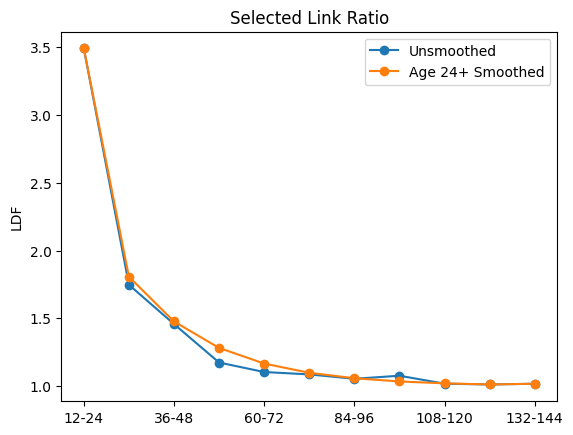

In [65]:
triangle = cl.load_sample('genins')
unsmoothed = cl.TailCurve().fit(triangle).ldf_
smoothed = cl.TailCurve(attachment_age=24).fit(triangle).ldf_
pd.concat((
    unsmoothed.T.iloc[:, 0].rename('Unsmoothed'),
    smoothed.T.iloc[:, 0].rename('Age 24+ Smoothed')),
    axis=1).plot(marker='o', title='Selected Link Ratio', ylabel='LDF');

### Periodo de Proyección
Independientemente de dónde se coloque una cola, habrá patrones incrementales hasta al menos un año después del final del Triángulo. Surgen casos en los que se desea modelar  en un horizonte temporal más largo. Para estos casos, es posible modificar el período de proyección (en meses) de todos los estimadores de cola especificando la cantidad de meses que desea extender sus patrones (dentro del parametro `projection_period`).

In [ ]:
# Extend tail run-off 4 years past end of Triangle.
tail = cl.TailCurve(projection_period=12*4).fit(triangle)
tail.ldf_[~tail.ldf_.development.isin(triangle.link_ratio.development)]

### Tasa de Caida
Se puede controlar la tasa de caída de su cola. También está disponible un parámetro exponencial `decay`

In [ ]:
tail = cl.TailConstant(tail=1.05, decay=0.95).fit_transform(triangle)
tail.ldf_
tail.tail_

## Modelos de OYNR - Definiciones en Comun
* Los Estimadores IBNR son la etapa final en el análisis de las estimaciones de reservas en el paquete Chainladder.
* Estos estimadores tienen un método de predicción en lugar de un método de transformación.
* Todos los métodos de reserva OYNR determinan el costo final de las reclamaciones de seguros (**ultimate claims** en inglés). Estos últimos se capturan en el atributo ``ultimate_`` del estimador.
* La diferencia entre los atributos `ultimate_` y `latest_diagonal` de un triangulo son guardados en el atributo `ibnr_` del estimador.

In [ ]:
cl.Chainladder().fit(cl.load_sample('raa')).ultimate_

In [ ]:
triangle = cl.load_sample('quarterly')
model = cl.Chainladder().fit(triangle)
case_reserves = (triangle['incurred']-triangle['paid']).latest_diagonal
true_ibnr = model.ibnr_['paid'] - case_reserves
true_ibnr.sum()

### Triangulos Completados
* Los atributos `full_triangle_` y `full_expectation_` dan una vista del triangulo completado
* `full_expectation_` Está basado en los valores que entrega el atributo `ultimate_` junto con los factores de desarrollo
* `full_triangle_` es una mezcla del triangulo real más lo proyectado de acuerdo al método de completado

In [ ]:
model = cl.Chainladder().fit(cl.load_sample('ukmotor'))
residuals = model.full_expectation_ - model.full_triangle_
residuals[residuals.valuation<=model.X_.valuation_date]

Otro análisis típico es predecir el OYNR para períodos futuros.

In [ ]:
expected_3y_run_off = model.full_triangle_.dev_to_val().cum_to_incr().loc[..., '2014':'2016']
expected_3y_run_off

## Modelos de OYNR - Metodologias
### `Chainladder`
* Metodo mas basico de estimación de OYNR
* La característica distintiva del método ``:class:Chainladder`` es que las reclamaciones finales para cada año de accidente se generan a partir de valores registrados, suponiendo que el desarrollo de las reclamaciones futuras es similar al desarrollo de años anteriores.
* Algunos supuestos subyacentes del modelo son:
    * Los siniestros registrados hasta la fecha continuarán desarrollándose de manera similar en el futuro
    * Para un año de accidentes reciente, los siniestros observados hasta ahora le dicen algo sobre los siniestros aún por observar. Esto contrasta con los supuestos subyacentes a la técnica de reclamaciones esperadas (expected loss ratio).
    * Procesamiento consistente de reclamos
    * Combinación estable de tipos de reclamos
    * Límites de póliza estables
### `MackChainladder`
* Puede considerarse como una forma especial de regresión lineal ponderada a través del origen para cada período de desarrollo.
* Dado lo anterior, las estadísticas sobre la variabilidad de los datos y las estimaciones de los parámetros permiten estimar los errores de predicción
* Es el método más básico de los métodos estocásticos.
* Solo es compatible con los estimadores ``Development`` y ``TailCurve``.

### `BornhuetterFerguson`
* Es esencialmente una combinación de las técnicas de desarrollo y de reclamaciones esperadas
* En la técnica de desarrollo de triangulos
    * Multiplicamos las reclamaciones reales por un factor de desarrollo de reclamaciones acumulativo
    * **Esta técnica puede conducir a proyecciones erráticas y poco confiables cuando el factor de desarrollo acumulativo es grande porque una variación relativamente pequeña en las reclamaciones reportadas o la presentación de una reclamación inusualmente grande podría resultar en una variación muy grande en las reclamaciones finales proyectadas**
* En la técnica de reclamaciones esperadas
    * La estimación de reclamaciones impagas es igual a la diferencia entre una estimación predeterminada de reclamaciones esperadas y los pagos reales
    * **Esto tiene la ventaja de la estabilidad, pero ignora por completo los resultados reales informados**

* La técnica de Bornhuetter-Ferguson combina las dos técnicas al dividir los reclamos finales en dos componentes: reclamos reales reportados (o pagados) y reclamos esperados no reportados (o no pagados). A medida que la experiencia madura, se le da más peso a las reclamaciones reales y las reclamaciones esperadas se vuelven gradualmente menos importantes.
* Es uno de los tantos estimadores que soporta una medida de exposicion. Para esto, debemos agregarla durante el método `fit` a traves del argumento `sample_weight`, entregando una triángulo que represente la exposición.
* Debemos tener una estimacion *a priori* de la siniestralidad esperada podemos usar el argumento `a priori` para establecerlo dentro del estimador.

In [ ]:
cl_ult = cl.Chainladder().fit(raa).ultimate_ # Chainladder Ultimate
apriori = cl_ult*0+(cl_ult.sum()/10) # Mean Chainladder Ultimate
cl.BornhuetterFerguson(apriori=1).fit(raa, sample_weight=apriori).ultimate_

### ``Benktander``
* Es un promedio ponderado por factoeres de credibilidad de las técnica ``BornhuetterFerguson`` y `Chainladder`
* La ventaja citada por los autores es que este método resultará más receptivo que la técnica de Bornhuetter-Ferguson y más estable que la técnica de Chainladder.

$Ultimate = Apriori\times (1-\frac{1}{CDF})^{n} + Latest\times \sum_{k=0}^{n-1}(1-\frac{1}{CDF})^{k}$
* Donde
    * n=0 corresponde al método de pérdida esperada.
    * n=1 es el método BornhuetterFerguson.
    * n>>1 converge al metodo Chainladder.

### ``CapeCod``
* También conocido como método de Stanard-Buhlmann, es similar a la técnica de Bornhuetter-Ferguson
* La principal diferencia entre los dos métodos es la derivación del índice de siniestralidad esperado.
* Se obtiene del propio triángulo en lugar de una selección independiente y a menudo basada en criterios como en la técnica de Bornhuetter-Ferguson


## Anexo - Resumen de Estructuras de Datos y Estructura de `Chainladder`
### ¿Qué es una clase?
* Las clases proporcionan un medio para agrupar datos y funcionalidades.
* La creación de una nueva clase crea un nuevo tipo de objeto, lo que permite crear nuevas instancias de ese tipo.
* En otras palabras, una clase es una plantilla de código para crear objetos.

### Atributos y Métodos dentro de una Clase:
Una clase por sí sola no sirve de nada a menos que haya alguna funcionalidad asociada a ella. Las funcionalidades se definen estableciendo atributos, que actúan como contenedores para datos y funciones relacionadas con esos atributos. Esas funciones se llaman métodos.

### ``scikit-learn`` y `Chainladder`
La librería ``scikit-learn`` es una interfaz de modelado común que se utiliza para construir y adaptar una variedad incontable de algoritmos de aprendizaje automático. La interfaz común permite un intercambio muy rápido entre modelos con cambios mínimos de código. El paquete ``Chainladder`` ha adoptado la interfaz para promover un enfoque estandarizado para adaptar modelos de reserva. Esto es, usa su misma estructura de objetos y clases.

### Estimadores
* Es un tipo de objeto.
* Todos los objetos del tipo estimador se pueden configurar opcionalmente con parámetros para especificar de forma única el modelo que se está construyendo. Esto se hace antes de enviar cualquier dato a través del modelo.
* Todos los estimadores en `Chainladder` poseen una de las siguientes caracteristicas:
    * Poseen el método `transform`, que transforma el Triángulo de entrada y le otorga nueos atributos
    * Predicen un resultado con el método `predict`.

```python
estimator = Estimator(param1=1, param2=2)
```

Todos los estimadores en la librería ``Chainladder``poseen un método llamado `fit` que toma una `Triangle` como input.

```python
estimator.fit(X=data)

```

Todos los estimadores incluyen una opción ``sample_weight`` en el método ``fit`` para especificar una base de exposición. Si una base de exposición no es aplicable, entonces se ignora este argumento.

```python
estimator.fit(X=data, sample_weight=weight)
```


### Transformers
En ``scikit-learn``, un transformador se refiere a un objeto que transforma un conjunto de datos en uno nuevo para preparar el conjunto de datos para el modelado predictivo.

Exceptuando los modelos IBNR finales, los estimadores de ``chainladder`` son transformadores. Es decir, devuelven el objeto `Triangle` con propiedades adicionales.

```python
# Fitting and Transforming
estimator.fit(data)
transformed_data = estimator.transform(data)
# One line equivalent
transformed_data = estimator.fit_transform(data)
```

### Predictors
Todos los predictores incluyen un método de predicción.

````python
prediction = estimator.predict(new_data)
````

Los predictores están destinados a crear nuevas predicciones. No es raro ajustar un modelo sobre una data más agregada (digamos a nivel nacional) y predecir en un triángulo más granular (estatal o provincial).



